# Buildings' Geo-Coordinates

In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import sys

#from bokeh.plotting import *
#from bokeh.models import HoverTool
from collections import OrderedDict


## Data Analysis

### Detroit-Demolition-Permits

In [2]:
# Import the dataset & print #rows
dt = pd.read_csv('detroit-demolition-permits.tsv', sep='\t', header=0)
dt_nrows = dt.shape[0]
print(dt_nrows)
dt.head()

7133


PERMIT_NO PERMIT_APPLIED PERMIT_ISSUED PERMIT_EXPIRES  \
0  BLD2015-03955        8/28/15       8/28/15            NaN   
1  BLD2015-04083        8/28/15       8/28/15            NaN   
2  BLD2015-03976        8/28/15       8/28/15            NaN   
3  BLD2015-03781        8/28/15       8/28/15            NaN   
4  BLD2015-03677        8/28/15       8/28/15            NaN   

         SITE_ADDRESS                           BETWEEN1     PARCEL_NO  \
0        4331  BARHAM         BETWEEN VOIGHT AND WAVENEY    21 65525-6   
1     9707  BESSEMORE         BETWEEN VINTON AND GRATIOT      19 2312.   
2     5315  BERKSHIRE  BETWEEN SOUTHAMPTON AND FRANKFORT     21 69321.   
3  16670  BRINGARD DR    BETWEEN CUSHING AND SHAKESPEARE     21 25930.   
4      1454  BEATRICE         BETWEEN TORONTO AND GILROY  20 12871.012   

  LOT_NUMBER SUBDIVISION CASE_TYPE ...  CONTRACTOR_ADDRESS1  \
0        S15         NaN       BLD ...          13500 FOLEY   
1         40         NaN       BLD ...          13500 FOLEY   
2        445         NaN       BLD ...          13500 FOLEY   
3         97         NaN       BLD ...          13500 FOLEY   
4         21         NaN       BLD ...          13500 FOLEY   

  CONTRACTOR_ADDRESS2 CONTRACTOR_CITY  CONTRACTOR_STATE  CONTRACTOR_ZIP  \
0                 NaN         DETROIT               NaN         48227.0   
1                 NaN         DETROIT               NaN         48227.0   
2                 NaN         DETROIT               NaN         48227.0   
3                 NaN         DETROIT               NaN         48227.0   
4                 NaN         DETROIT               NaN         48227.0   

   CONDITION_FOR_APPROVAL                                      site_location  \
0                     NaN    4331 BARHAM\nDetroit, MI\n(42.394106, -82.9474)   
1                     NaN  9707 BESSEMORE\nDetroit, MI\n(42.395122, -83.0...   
2                     NaN  5315 BERKSHIRE\nDetroit, MI\n(42.40322, -82.94...   
3                     NaN  16670 BRINGARD DR\nDetroit, MI\n(42.44664, -82...   
4                     NaN  1454 BEATRICE\nDetroit, MI\n(42.276956, -83.14...   

                                      owner_location  \
0  65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...   
1  65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...   
2  65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...   
3  65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...   
4  65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...   

                                 contractor_location geom  
0  13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)  NaN  
1  13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)  NaN  
2  13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)  NaN  
3  13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)  NaN  
4  13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)  NaN  

[5 rows x 55 columns]

In [3]:
# Drop all NaN columns if any exist
dt=dt.dropna(axis=0,how='all')
dt.head()

PERMIT_NO PERMIT_APPLIED PERMIT_ISSUED PERMIT_EXPIRES  \
0  BLD2015-03955        8/28/15       8/28/15            NaN   
1  BLD2015-04083        8/28/15       8/28/15            NaN   
2  BLD2015-03976        8/28/15       8/28/15            NaN   
3  BLD2015-03781        8/28/15       8/28/15            NaN   
4  BLD2015-03677        8/28/15       8/28/15            NaN   

         SITE_ADDRESS                           BETWEEN1     PARCEL_NO  \
0        4331  BARHAM         BETWEEN VOIGHT AND WAVENEY    21 65525-6   
1     9707  BESSEMORE         BETWEEN VINTON AND GRATIOT      19 2312.   
2     5315  BERKSHIRE  BETWEEN SOUTHAMPTON AND FRANKFORT     21 69321.   
3  16670  BRINGARD DR    BETWEEN CUSHING AND SHAKESPEARE     21 25930.   
4      1454  BEATRICE         BETWEEN TORONTO AND GILROY  20 12871.012   

  LOT_NUMBER SUBDIVISION CASE_TYPE ...  CONTRACTOR_ADDRESS1  \
0        S15         NaN       BLD ...          13500 FOLEY   
1         40         NaN       BLD ...          13500 FOLEY   
2        445         NaN       BLD ...          13500 FOLEY   
3         97         NaN       BLD ...          13500 FOLEY   
4         21         NaN       BLD ...          13500 FOLEY   

  CONTRACTOR_ADDRESS2 CONTRACTOR_CITY  CONTRACTOR_STATE  CONTRACTOR_ZIP  \
0                 NaN         DETROIT               NaN         48227.0   
1                 NaN         DETROIT               NaN         48227.0   
2                 NaN         DETROIT               NaN         48227.0   
3                 NaN         DETROIT               NaN         48227.0   
4                 NaN         DETROIT               NaN         48227.0   

   CONDITION_FOR_APPROVAL                                      site_location  \
0                     NaN    4331 BARHAM\nDetroit, MI\n(42.394106, -82.9474)   
1                     NaN  9707 BESSEMORE\nDetroit, MI\n(42.395122, -83.0...   
2                     NaN  5315 BERKSHIRE\nDetroit, MI\n(42.40322, -82.94...   
3                     NaN  16670 BRINGARD DR\nDetroit, MI\n(42.44664, -82...   
4                     NaN  1454 BEATRICE\nDetroit, MI\n(42.276956, -83.14...   

                                      owner_location  \
0  65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...   
1  65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...   
2  65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...   
3  65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...   
4  65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...   

                                 contractor_location geom  
0  13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)  NaN  
1  13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)  NaN  
2  13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)  NaN  
3  13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)  NaN  
4  13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)  NaN  

[5 rows x 55 columns]

In [4]:
dt.keys()

Index(['PERMIT_NO', 'PERMIT_APPLIED', 'PERMIT_ISSUED', 'PERMIT_EXPIRES',
       'SITE_ADDRESS', 'BETWEEN1', 'PARCEL_NO', 'LOT_NUMBER', 'SUBDIVISION',
       'CASE_TYPE', 'CASE_DESCRIPTION', 'LEGAL_USE', 'ESTIMATED_COST',
       'PARCEL_SIZE', 'PARCEL_CLUSTER_SECTOR', 'STORIES', 'PARCEL_FLOOR_AREA',
       'PARCEL_GROUND_AREA', 'PRC_AKA_ADDRESS', 'BLD_PERMIT_TYPE',
       'PERMIT_DESCRIPTION', 'BLD_PERMIT_DESC', 'BLD_TYPE_USE', 'RESIDENTIAL',
       'DESCRIPTION', 'BLD_TYPE_CONST_COD', 'BLD_ZONING_DIST', 'BLD_USE_GROUP',
       'BLD_BASEMENT', 'FEE_TYPE', 'CSM_CASENO', 'CSF_CREATED_BY', 'SEQ_NO',
       'PCF_AMT_PD', 'PCF_AMT_DUE', 'PCF_UPDATED', 'OWNER_LAST_NAME',
       'OWNER_FIRST_NAME', 'OWNER_ADDRESS1', 'OWNER_ADDRESS2', 'OWNER_CITY',
       'OWNER_STATE', 'OWNER_ZIP', 'CONTRACTOR_LAST_NAME',
       'CONTRACTOR_FIRST_NAME', 'CONTRACTOR_ADDRESS1', 'CONTRACTOR_ADDRESS2',
       'CONTRACTOR_CITY', 'CONTRACTOR_STATE', 'CONTRACTOR_ZIP',
       'CONDITION_FOR_APPROVAL', 'site_location',

In [5]:
dt.shape

(7133, 55)

In [6]:
geom = dt['geom'].dropna()
print(geom)

1274         (42.4339146200001, -83.12109915)
1275         (42.4339146200001, -83.12109915)
1276        (42.3395300650001, -83.056725774)
1277        (42.3530135830001, -83.100102729)
1278            (42.339636075, -83.055921481)
1279             (42.34034588, -83.054262195)
1280             (42.42302671, -83.108772039)
1281         (42.4069708150001, -83.14029386)
1282        (42.4158468420001, -83.206031538)
1283            (42.267767565, -83.160135887)
1284        (42.2922427230001, -83.139970069)
1285        (42.4181272070001, -83.093220844)
1286        (42.3407699200001, -83.055976791)
1287    (42.4119965890001, -83.1673389489999)
1288            (42.340885148, -83.055412173)
1289    (42.3708882620001, -83.1717972449999)
1290        (42.382706625, -83.2405722189999)
1291    (42.3432369550001, -83.1418114149999)
1292            (42.444351989, -83.211930068)
1293        (42.444351989, -83.2116696529999)
1294        (42.422020767, -83.0407839549999)
1295    (42.3309980970001, -83.037

In [7]:
dt['lat'] = dt['site_location'].apply(lambda x: pd.Series(str(x).split('\n')[-1].replace(",", "").strip("()").split(" ")[0])).dropna()
dt['lon'] = dt['site_location'].apply(lambda x: pd.Series(str(x).split('\n')[-1].replace(",", "").strip("()").split(" ")[-1])).dropna()
print(dt.head(1))

       PERMIT_NO PERMIT_APPLIED PERMIT_ISSUED PERMIT_EXPIRES  SITE_ADDRESS  \
0  BLD2015-03955        8/28/15       8/28/15            NaN  4331  BARHAM   

                     BETWEEN1   PARCEL_NO LOT_NUMBER SUBDIVISION CASE_TYPE  \
0  BETWEEN VOIGHT AND WAVENEY  21 65525-6        S15         NaN       BLD   

     ...    CONTRACTOR_CITY CONTRACTOR_STATE CONTRACTOR_ZIP  \
0    ...            DETROIT              NaN        48227.0   

   CONDITION_FOR_APPROVAL                                    site_location  \
0                     NaN  4331 BARHAM\nDetroit, MI\n(42.394106, -82.9474)   

                                      owner_location  \
0  65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...   

                                 contractor_location  geom        lat  \
0  13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)   NaN  42.394106   

        lon  
0  -82.9474  

[1 rows x 57 columns]


In [8]:
dt['location'] = '(' + dt['lat'] + ', ' + dt['lon'] + ')'
print(dt.head(1))

       PERMIT_NO PERMIT_APPLIED PERMIT_ISSUED PERMIT_EXPIRES  SITE_ADDRESS  \
0  BLD2015-03955        8/28/15       8/28/15            NaN  4331  BARHAM   

                     BETWEEN1   PARCEL_NO LOT_NUMBER SUBDIVISION CASE_TYPE  \
0  BETWEEN VOIGHT AND WAVENEY  21 65525-6        S15         NaN       BLD   

           ...           CONTRACTOR_STATE CONTRACTOR_ZIP  \
0          ...                        NaN        48227.0   

  CONDITION_FOR_APPROVAL                                    site_location  \
0                    NaN  4331 BARHAM\nDetroit, MI\n(42.394106, -82.9474)   

                                      owner_location  \
0  65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...   

                                 contractor_location  geom        lat  \
0  13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)   NaN  42.394106   

        lon               location  
0  -82.9474  (42.394106, -82.9474)  

[1 rows x 58 columns]


In [9]:
dt.keys()

Index(['PERMIT_NO', 'PERMIT_APPLIED', 'PERMIT_ISSUED', 'PERMIT_EXPIRES',
       'SITE_ADDRESS', 'BETWEEN1', 'PARCEL_NO', 'LOT_NUMBER', 'SUBDIVISION',
       'CASE_TYPE', 'CASE_DESCRIPTION', 'LEGAL_USE', 'ESTIMATED_COST',
       'PARCEL_SIZE', 'PARCEL_CLUSTER_SECTOR', 'STORIES', 'PARCEL_FLOOR_AREA',
       'PARCEL_GROUND_AREA', 'PRC_AKA_ADDRESS', 'BLD_PERMIT_TYPE',
       'PERMIT_DESCRIPTION', 'BLD_PERMIT_DESC', 'BLD_TYPE_USE', 'RESIDENTIAL',
       'DESCRIPTION', 'BLD_TYPE_CONST_COD', 'BLD_ZONING_DIST', 'BLD_USE_GROUP',
       'BLD_BASEMENT', 'FEE_TYPE', 'CSM_CASENO', 'CSF_CREATED_BY', 'SEQ_NO',
       'PCF_AMT_PD', 'PCF_AMT_DUE', 'PCF_UPDATED', 'OWNER_LAST_NAME',
       'OWNER_FIRST_NAME', 'OWNER_ADDRESS1', 'OWNER_ADDRESS2', 'OWNER_CITY',
       'OWNER_STATE', 'OWNER_ZIP', 'CONTRACTOR_LAST_NAME',
       'CONTRACTOR_FIRST_NAME', 'CONTRACTOR_ADDRESS1', 'CONTRACTOR_ADDRESS2',
       'CONTRACTOR_CITY', 'CONTRACTOR_STATE', 'CONTRACTOR_ZIP',
       'CONDITION_FOR_APPROVAL', 'site_location',

/home/tebo/anaconda2/envs/geodata/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


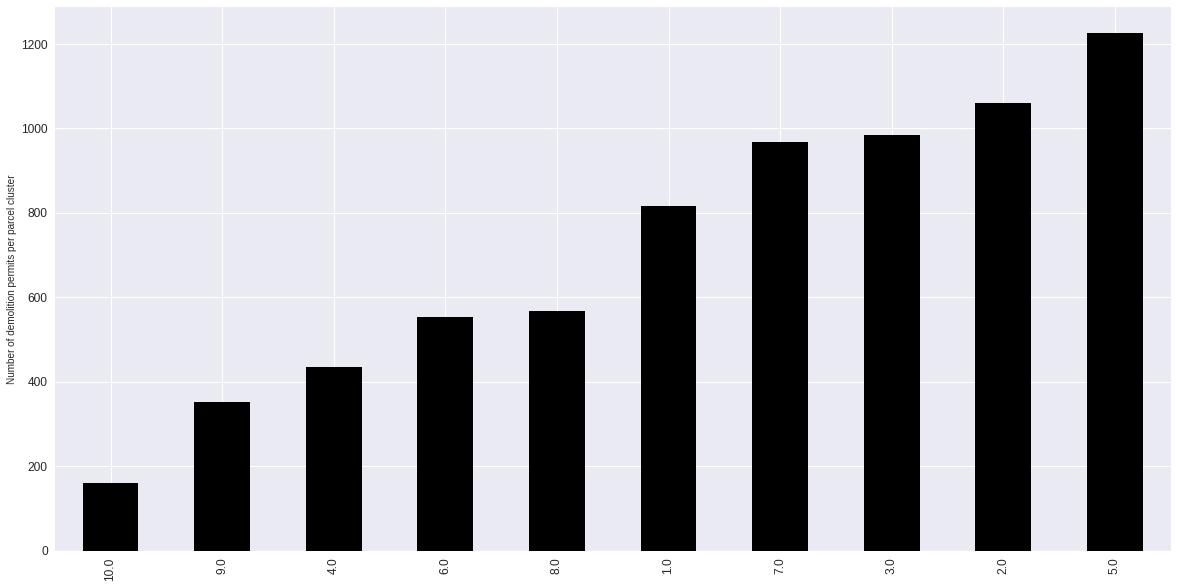

In [10]:
# Plotting number of issues (y) with each ticket (x)
def plotdata(data, cat):
    l=data.groupby(cat).size()
    l.sort()
    fig=plt.figure(figsize=(20,10))
    plt.yticks(fontsize=8)
    l.plot(kind='bar',fontsize=12,color='k')
    plt.xlabel('')
    plt.ylabel('Number of demolition permits per parcel cluster',fontsize=10)

plotdata(dt,'PARCEL_CLUSTER_SECTOR')

The fifth parcel cluster has the most permit issuing. The clusters could be based on level of blight in terms of urgency to demolition issued date. Let's look on that later.   

In [11]:
dt['PARCEL_CLUSTER_SECTOR'].describe()

count    7122.000000
mean        4.656136
std         2.522609
min         1.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: PARCEL_CLUSTER_SECTOR, dtype: float64

### Bight Violations

In [12]:
dt2 = pd.read_csv('detroit-blight-violations.csv')
dt_nrows2 = dt2.shape[0]
print(dt_nrows2)
dt2.head()

/home/tebo/anaconda2/envs/geodata/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


307804


TicketID TicketNumber                  AgencyName  \
0     26288  05000001DAH  Department of Public Works   
1     19800  05000025DAH  Department of Public Works   
2     19804  05000026DAH  Department of Public Works   
3     20208  05000027DAH  Department of Public Works   
4     20211  05000028DAH  Department of Public Works   

                    ViolName  ViolationStreetNumber ViolationStreetName  \
0  Group, LLC, Grand Holding                   2566    GRAND BLVD         
1        JACKSON, RAECHELLE                   19014    ASHTON             
2          TALTON, CAROL ANN                  18735    STAHELIN           
3          BONNER, DARRYL E.                  20125    MONICA             
4         GREGORY, JAMES LEE                  17397    PRAIRIE            

  MailingStreetNumber   MailingStreetName MailingCity MailingState  \
0                 743  Beaubien, Ste. 201     Detroit           MI   
1               20501              HEYDEN     DETROIT           MI   
2               18735           STAHELI N     DETROIT           MI   
3               25335           PEEKSKILL  SOUTHFIELD           MI   
4               17397             PRAIRIE     DETROIT           MI   

                         ...                         AdminFee  LateFee  \
0                        ...                           $20.00  $150.00   
1                        ...                           $20.00   $10.00   
2                        ...                           $20.00   $10.00   
3                        ...                           $20.00   $10.00   
4                        ...                           $20.00   $10.00   

  StateFee CleanUpCost JudgmentAmt       PaymentStatus Void ViolationCategory  \
0   $10.00       $0.00    $1680.00        PAID IN FULL  0.0                 0   
1   $10.00       $0.00     $140.00  NO PAYMENT APPLIED  0.0                 0   
2   $10.00       $0.00     $140.00        PAID IN FULL  0.0                 0   
3   $10.00       $0.00     $140.00  NO PAYMENT APPLIED  0.0                 0   
4   $10.00       $0.00     $140.00        PAID IN FULL  0.0                 0   

                                    ViolationAddress  \
0  2566 GRAND BLVD\nDetroit, MI\n(42.363182370000...   
1  19014 ASHTON\nDetroit, MI\n(42.429390762000025...   
2  18735 STAHELIN\nDetroit, MI\n(42.4287074590000...   
3  20125 MONICA\nDetroit, MI\n(42.44169828400004,...   
4  17397 PRAIRIE\nDetroit, MI\n(42.42031769500005...   

                                      MailingAddress  
0  743 Beaubien\nDetroit, MI 48226\n(42.333730630...  
1  20501 HEYDEN\nDETROIT, MI 48219\n(42.442177633...  
2  18735 STAHELI N\nDETROIT, MI 48219\n(42.428707...  
3  25335 PEEKSKILL\nSOUTHFIELD, MI 48043\n(42.475...  
4  17397 PRAIRIE\nDETROIT, MI 48221\n(42.42031769...  

[5 rows x 31 columns]

In [13]:
dt2.keys()

Index(['TicketID', 'TicketNumber', 'AgencyName', 'ViolName',
       'ViolationStreetNumber', 'ViolationStreetName', 'MailingStreetNumber',
       'MailingStreetName', 'MailingCity', 'MailingState', 'MailingZipCode',
       'NonUsAddressCode', 'Country', 'TicketIssuedDT', 'TicketIssuedTime',
       'HearingDT', 'CourtTime', 'ViolationCode', 'ViolDescription',
       'Disposition', 'FineAmt', 'AdminFee', 'LateFee', 'StateFee',
       'CleanUpCost', 'JudgmentAmt', 'PaymentStatus', 'Void',
       'ViolationCategory', 'ViolationAddress', 'MailingAddress'],
      dtype='object')

In [14]:
dt2.shape

(307804, 31)

In [15]:
print(dt2['ViolDescription'].describe())
dt2['ViolDescription'].head()

count                                                307804
unique                                                  298
top       Failure of owner to obtain certificate of comp...
freq                                                 106521
Name: ViolDescription, dtype: object


0                   Burning solid waste  in open fires
1    Bulk solid waste deposited more than 24 hours ...
2    Bulk solid waste deposited more than 24 hours ...
3    Violation of time limit for approved container...
4    Bulk solid waste deposited more than 24 hours ...
Name: ViolDescription, dtype: object

In [16]:
print(dt2['ViolName'].describe())
print(dt2['ViolName'].unique())

count                 307802
unique                152621
top       INVESTMENT, ACORN 
freq                     789
Name: ViolName, dtype: object
['Group, LLC, Grand Holding' 'JACKSON, RAECHELLE ' 'TALTON, CAROL ANN' ...,
 'KHANOM, HANIFA ' 'LEWIS JR, QUINCY C' 'DILLARD, LAKRESHA ']


In [17]:
dt2['lat'] = dt2['ViolationAddress'].apply(lambda x: pd.Series(str(x).split('\n')[-1].replace(",", "").strip("()").split(" ")[0])).dropna()
dt2['lon'] = dt2['ViolationAddress'].apply(lambda x: pd.Series(str(x).split('\n')[-1].replace(",", "").strip("()").split(" ")[-1])).dropna() 
print(dt2.head(1))

   TicketID TicketNumber                  AgencyName  \
0     26288  05000001DAH  Department of Public Works   

                    ViolName  ViolationStreetNumber ViolationStreetName  \
0  Group, LLC, Grand Holding                   2566    GRAND BLVD         

  MailingStreetNumber   MailingStreetName MailingCity MailingState  \
0                 743  Beaubien, Ste. 201     Detroit           MI   

          ...         StateFee CleanUpCost JudgmentAmt PaymentStatus Void  \
0         ...           $10.00       $0.00    $1680.00  PAID IN FULL  0.0   

  ViolationCategory                                   ViolationAddress  \
0                 0  2566 GRAND BLVD\nDetroit, MI\n(42.363182370000...   

                                      MailingAddress                lat  \
0  743 Beaubien\nDetroit, MI 48226\n(42.333730630...  42.36318237000006   

                  lon  
0  -83.09167672099994  

[1 rows x 33 columns]


In [18]:
dt2['address'] = dt2['ViolationAddress'].apply(lambda x: pd.Series(str(x).split('\n')[0])).dropna() 
print(dt2.head(1))

   TicketID TicketNumber                  AgencyName  \
0     26288  05000001DAH  Department of Public Works   

                    ViolName  ViolationStreetNumber ViolationStreetName  \
0  Group, LLC, Grand Holding                   2566    GRAND BLVD         

  MailingStreetNumber   MailingStreetName MailingCity MailingState  \
0                 743  Beaubien, Ste. 201     Detroit           MI   

        ...        CleanUpCost JudgmentAmt PaymentStatus Void  \
0       ...              $0.00    $1680.00  PAID IN FULL  0.0   

  ViolationCategory                                   ViolationAddress  \
0                 0  2566 GRAND BLVD\nDetroit, MI\n(42.363182370000...   

                                      MailingAddress                lat  \
0  743 Beaubien\nDetroit, MI 48226\n(42.333730630...  42.36318237000006   

                  lon          address  
0  -83.09167672099994  2566 GRAND BLVD  

[1 rows x 34 columns]


In [19]:
# Drop features that are obsolete
dt2.drop(["ViolationStreetNumber", "ViolationStreetName"], axis=1, inplace=True, errors="ignore")
print(dt2.head(1))

   TicketID TicketNumber                  AgencyName  \
0     26288  05000001DAH  Department of Public Works   

                    ViolName MailingStreetNumber   MailingStreetName  \
0  Group, LLC, Grand Holding                 743  Beaubien, Ste. 201   

  MailingCity MailingState MailingZipCode NonUsAddressCode       ...         \
0     Detroit           MI          48226              NaN       ...          

  CleanUpCost JudgmentAmt PaymentStatus Void ViolationCategory  \
0       $0.00    $1680.00  PAID IN FULL  0.0                 0   

                                    ViolationAddress  \
0  2566 GRAND BLVD\nDetroit, MI\n(42.363182370000...   

                                      MailingAddress                lat  \
0  743 Beaubien\nDetroit, MI 48226\n(42.333730630...  42.36318237000006   

                  lon          address  
0  -83.09167672099994  2566 GRAND BLVD  

[1 rows x 32 columns]


In [20]:
dt2['location'] = '(' + dt2['lat'] + ', ' + dt2['lon'] + ')'
print(dt2.head(1))

   TicketID TicketNumber                  AgencyName  \
0     26288  05000001DAH  Department of Public Works   

                    ViolName MailingStreetNumber   MailingStreetName  \
0  Group, LLC, Grand Holding                 743  Beaubien, Ste. 201   

  MailingCity MailingState MailingZipCode NonUsAddressCode  \
0     Detroit           MI          48226              NaN   

                    ...                    JudgmentAmt PaymentStatus Void  \
0                   ...                       $1680.00  PAID IN FULL  0.0   

  ViolationCategory                                   ViolationAddress  \
0                 0  2566 GRAND BLVD\nDetroit, MI\n(42.363182370000...   

                                      MailingAddress                lat  \
0  743 Beaubien\nDetroit, MI 48226\n(42.333730630...  42.36318237000006   

                  lon          address  \
0  -83.09167672099994  2566 GRAND BLVD   

                                  location  
0  (42.36318237000006, -83.09167

/home/tebo/anaconda2/envs/geodata/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


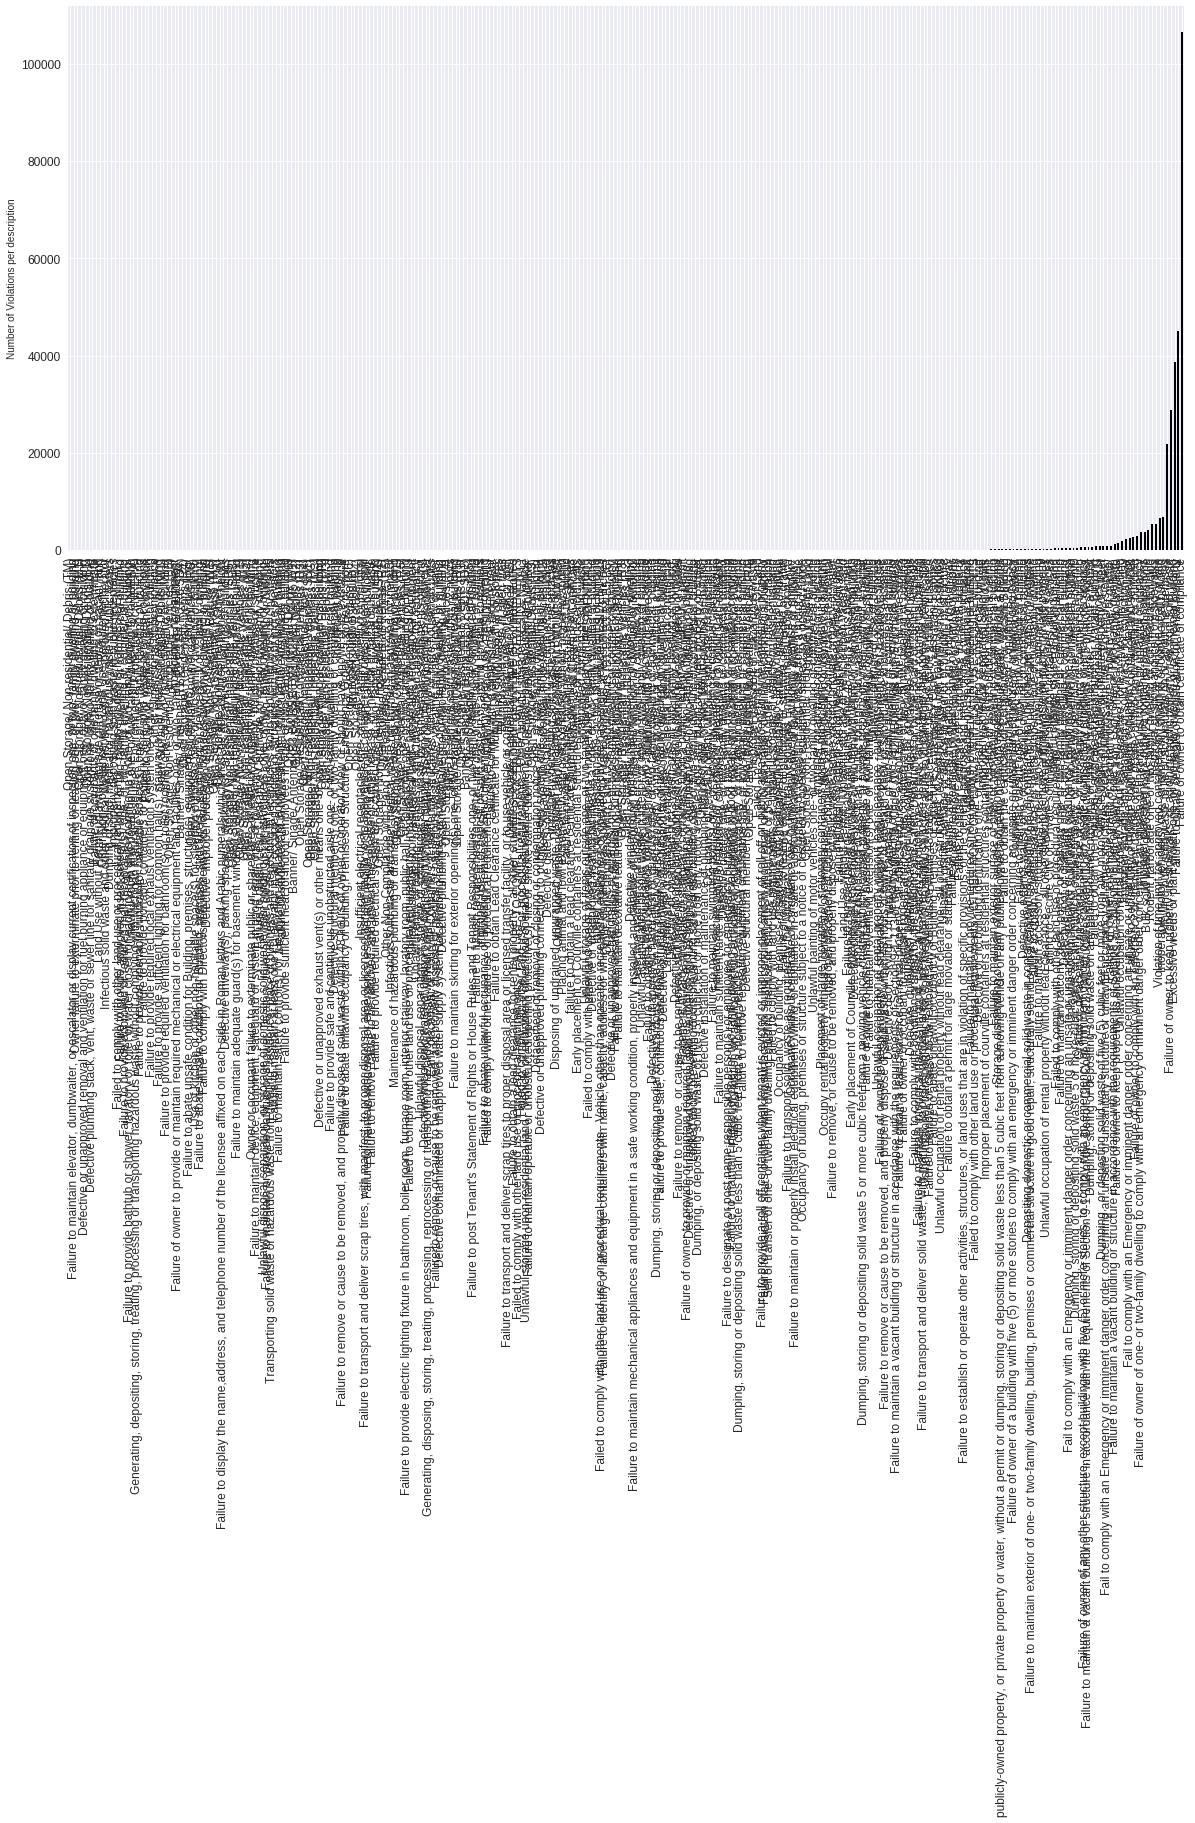

In [21]:
# Plotting number of violations (y) with each ticket (x)
def plotdata(data, cat):
    l=data.groupby(cat).size()
    l.sort()
    fig=plt.figure(figsize=(20,10))
    plt.yticks(fontsize=8)
    l.plot(kind='bar',fontsize=12,color='k')
    plt.xlabel('')
    plt.ylabel('Number of Violations per description',fontsize=10)

plotdata(dt2,'ViolDescription')

In [23]:
dt2['ViolDescription'].describe()

count                                                307804
unique                                                  298
top       Failure of owner to obtain certificate of comp...
freq                                                 106521
Name: ViolDescription, dtype: object

In [26]:
dt2[dt2['ViolDescription'] == 'Failure of owner to obtain certificate of compliance'].head()

TicketID TicketNumber                                  AgencyName  \
1445     18708  05001500DAH  Building and Safety Engineering Department   
1446     18712  05001503DAH  Building and Safety Engineering Department   
1447     18713  05001504DAH  Building and Safety Engineering Department   
1448     18714  05001505DAH  Building and Safety Engineering Department   
1449     18717  05001507DAH  Building and Safety Engineering Department   

                                ViolName MailingStreetNumber  \
1445                     AJ's Place, **                11601   
1446  Rising Star Missionary Baptist, *                11525   
1447                Quality Car Care, *                11445   
1448        City Clipper Barber Shop, *                11425   
1449           STAR Community Center, *                11555   

     MailingStreetName MailingCity MailingState MailingZipCode  \
1445          Whittier     Detroit           MI          48205   
1446          Whittier     Detroit           MI          48205   
1447          Whittier     Detroit           MI          48205   
1448          Whittier     Detroit           MI          48205   
1449          Whittier     Detroit           MI          48205   

     NonUsAddressCode                    ...                    JudgmentAmt  \
1445              NaN                    ...                        $305.00   
1446              NaN                    ...                        $305.00   
1447              NaN                    ...                        $305.00   
1448              NaN                    ...                        $305.00   
1449              NaN                    ...                        $305.00   

           PaymentStatus Void ViolationCategory  \
1445  NO PAYMENT APPLIED  0.0                 0   
1446  NO PAYMENT APPLIED  0.0                 0   
1447  NO PAYMENT APPLIED  0.0                 0   
1448  NO PAYMENT APPLIED  0.0                 0   
1449  NO PAYMENT APPLIED  0.0                 0   

                                       ViolationAddress  \
1445  11601 WHITTIER\nDetroit, MI\n(42.4203130860000...   
1446  11525 WHITTIER\nDetroit, MI\n(42.4198832850000...   
1447  11445 WHITTIER\nDetroit, MI\n(42.4197127470000...   
1448  11425 WHITTIER\nDetroit, MI\n(42.4196332400000...   
1449  11555 WHITTIER\nDetroit, MI\n(42.4201823490000...   

                                         MailingAddress                 lat  \
1445  11601 Whittier\nDetroit, MI 48205\n(42.4323480...   42.42031308600008   
1446  11525 Whittier\nDetroit, MI 48205\n(42.4323480...  42.419883285000026   
1447  11445 Whittier\nDetroit, MI 48205\n(42.4323480...   42.41971274700006   
1448  11425 Whittier\nDetroit, MI 48205\n(42.4323480...   42.41963324000005   
1449  11555 Whittier\nDetroit, MI 48205\n(42.4323480...   42.42018234900007   

                     lon         address  \
1445  -82.96127074799995  11601 WHITTIER   
1446  -82.96023138999999  11525 WHITTIER   
1447  -82.95983154799995  11445 WHITTIER   
1448  -82.95963105099997  11425 WHITTIER   
1449  -82.96093287099995  11555 WHITTIER   

                                      location  
1445   (42.42031308600008, -82.96127074799995)  
1446  (42.419883285000026, -82.96023138999999)  
1447   (42.41971274700006, -82.95983154799995)  
1448   (42.41963324000005, -82.95963105099997)  
1449   (42.42018234900007, -82.96093287099995)  

[5 rows x 33 columns]

In [27]:
dt2['ViolDescription'].min()

'Allowing bulk solid waste to lie or accumulate on or about the premises'

The mosted reported violation is 'Failure of owner to obtain certificate of compliance', while the least is 'Allowing bulk solid waste to lie or accumulate on or about the premises'. The most reported violation could be the most influential violation that speeds up the demolition pocess of a building. We'll try and look at this further later on in the Capstone.

## Geospatial Mapping of Buildings

### Detroit-Demolition-Permits

In [28]:
# From detroit-demolition-permits dataset
lat = dt['lat'].convert_objects(convert_numeric=True).dropna()
lon = dt['lon'].convert_objects(convert_numeric=True).dropna()

/home/tebo/anaconda2/envs/geodata/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
/home/tebo/anaconda2/envs/geodata/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [29]:
# Cluster map of detroit-demolition-permits 2015 data
import folium
from folium.plugins import MarkerCluster

#for speed purposes
n = 1000
lons=lon[0:n]
lats=lat[0:n]

locations = list(zip(lats, lons))
#popups = [each[1]['Category'] + ": " + each[1]['Destrict'].format(each) for each in locations]
#popups = ['{}'.format(loc) for loc in locations]


mapa = folium.Map(location=[np.mean(lats), np.mean(lons)],zoom_start=6)
mapa.add_children(MarkerCluster(locations=locations, popups=dt['SITE_ADDRESS'] + ": " + dt['LEGAL_USE'] + ": " + dt['RESIDENTIAL'] + ": " + dt['OWNER_LAST_NAME'] + ": " + dt['PARCEL_NO'] + ": " + dt['site_location']))

mapa


Note: This is an interactive map of the buildings in clusters. To see the individual buildings you have to click on the actual clusters. 

As you can see on the above map, there are two regions with outliers (namely the two green clusters after the first cluster is opened). It seems the two clusters are located on the outskirts from the south-west and north-west of the Detroit region. Reasons for this could be that demolitions are growing further outwards towards Lincoln Park (south-west from central Detroit) and Farmington (north-west from central Detroit) at a slower rate compared to Dearborn Heights (Far west from central Detroit) or Warren (Far north from central Detroit).

This could be a good starting point to try and stop the growth from continuing further out the city towards those two outlier regions, since they have a better chance of surviving.

In [30]:
clusters = dt['PARCEL_SIZE']
print(clusters.describe())

count    7.088000e+03
mean     1.354004e+04
std      1.047168e+05
min      0.000000e+00
25%      3.354000e+03
50%      4.095000e+03
75%      4.932000e+03
max      2.554576e+06
Name: PARCEL_SIZE, dtype: float64


It seems the biggest parcel being demolished is about 2 554 576 sq/ft. 

### Blight Violations

In [31]:
# From blight-violations dataset 
lon2 = dt2['lon'].convert_objects(convert_numeric=True).dropna()
lat2 = dt2['lat'].convert_objects(convert_numeric=True).dropna()

/home/tebo/anaconda2/envs/geodata/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
/home/tebo/anaconda2/envs/geodata/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [32]:
# Cluster map of blight-violations 2015 data
import folium
from folium.plugins import MarkerCluster
import numpy as np

#for speed purposes
n = 1000
lons2=lon2[0:n]
lats2=lat2[0:n]

locations2 = list(zip(lats2, lons2))
#popups = [each[1]['Category'] + ": " + each[1]['Destrict'].format(each) for each in locations]
#popups = ['{}'.format(loc) for loc in locations]


mapa2 = folium.Map(location=[np.mean(lats2), np.mean(lons2)],zoom_start=6)
mapa2.add_children(MarkerCluster(locations=locations2, popups=dt2['address'] + ": " + dt2['ViolName'] + ": " + dt2['ViolDescription'] + ": " + dt2['AgencyName'] + ": " + dt2['location']))

mapa2

### Both  Detroit-Demolition-Permits & Blight-Violations 

In [35]:
# Cluster map of descriptive 2015 data
import folium
from folium.plugins import MarkerCluster

#for speed purposes
n = 2000
lons3=lon2[1000:n]
lats3=lat2[1000:n]

#locations3 = list(zip(lats, lons))
#locations4 = list(zip(lats2, lons2))
#popups = [each[1]['Category'] + ": " + each[1]['Destrict'].format(each) for each in locations]
#popups = ['{}'.format(loc) for loc in locations]


mapa3 = folium.Map(location=[np.mean(lats3), np.mean(lons3)],zoom_start=6)
mapa3.add_children(MarkerCluster(locations=locations, popups=dt['PARCEL_NO'] + ": " + dt['SITE_ADDRESS'] + ": " + dt['LEGAL_USE'] + ": " + dt['RESIDENTIAL'] + ": " + dt['OWNER_LAST_NAME'] + ": " + dt['site_location']))
#mapa6.add_children(MarkerCluster(locations=locations2, popups=dt['SITE_ADDRESS'] + ": " +t2['address'] + ": " + dt2['issue_type'] + ": " + dt2['issue_description'] + ": " + dt2['location']))
mapa3.add_children(MarkerCluster(locations=locations2, popups=dt2['address'] + ": " + dt2['ViolName'] + ": " + dt2['ViolDescription'] + ": " + dt2['AgencyName'] + ": " + dt2['location']))
#mapa6.add_children(MarkerCluster(locations=locations4, popups=dt4['ADDRESS'] + ": " + dt4['CATEGORY'] + ": " + dt4['OFFENSEDESCRIPTION']))

mapa3.save('buildings(blight-permits).html')
mapa3

In [33]:
# FIND HTML FILE FOR THIS SECTION
import folium
#from folium.plugins import 

m = folium.Map([np.mean(lats), np.mean(lons)], zoom_start=11)

#folium.Marker([45,-30], popup="inline implicit popup").add_to(m)

#folium.CircleMarker([45,-10], radius=1e5, popup=folium.Popup("inline explicit Popup")).add_to(m)

ls = folium.PolyLine([[42.262621, -83.155227],[42.440038571000059, -82.973657279999941],[42.276956, -83.147536],[42.278392, -83.147524]], color='blue')
ls.add_children(folium.Popup("outline Popup on Polyline"))
ls.add_to(m)

#gj = folium.GeoJson({ "type": "Polygon", "coordinates": [42.262621, -83.155227]})
#gj.add_children(folium.Popup("outline Popup on GeoJSON"))
#gj.add_to(m)

m

In [34]:
# FIND HTML FILE FOR THIS SECTION
import folium
#from folium.plugins import 

m = folium.Map([np.mean(lats), np.mean(lons)], zoom_start=11)

#folium.Marker([45,-30], popup="inline implicit popup").add_to(m)

#folium.CircleMarker([45,-10], radius=1e5, popup=folium.Popup("inline explicit Popup")).add_to(m)

ls = folium.PolyLine([[42.44005858700007, -83.28649768199995],[42.359049, -83.19276],[42.36387317000003, -83.10624047599998],[42.36318237000006, -83.09167672099994]], color='blue')
ls.add_children(folium.Popup("outline Popup on Polyline"))
ls.add_to(m)

#gj = folium.GeoJson({ "type": "Polygon", "coordinates": [42.262621, -83.155227]})
#gj.add_children(folium.Popup("outline Popup on GeoJSON"))
#gj.add_to(m)

m

Note: The solid thick blue line in the above two maps signifies trend direction of demolition towards least demolished clusters.

The above two maps show the direction towards the two green outlier clusters found in the 'Both Detroit-Demolition-Permits & Blight-Violations' map. This might correlate with the above theory for trying to stop the 'blight-plague' encompassing the whole of Detroit. 

In [70]:
owners = dt2[dt2['ViolName']=='Detroit Land Bank Authority']
print(owners.count())

TicketID               67
TicketNumber           67
AgencyName             67
ViolName               67
MailingStreetNumber    67
MailingStreetName      67
MailingCity            67
MailingState           67
MailingZipCode         67
NonUsAddressCode        0
Country                67
TicketIssuedDT         67
TicketIssuedTime       67
HearingDT              67
CourtTime              67
ViolationCode          67
ViolDescription        67
Disposition            67
FineAmt                63
AdminFee               67
LateFee                67
StateFee               67
CleanUpCost            67
JudgmentAmt            63
PaymentStatus          67
Void                   67
ViolationCategory      67
ViolationAddress       67
MailingAddress         67
lat                    67
lon                    67
address                67
location               67
dtype: int64


In [71]:
owners2 = dt[dt['OWNER_LAST_NAME']=='DETROIT LAND BANK-HHF2']
print(owners2.count())

PERMIT_NO                 413
PERMIT_APPLIED            413
PERMIT_ISSUED             413
PERMIT_EXPIRES            339
SITE_ADDRESS              413
BETWEEN1                  413
PARCEL_NO                 413
LOT_NUMBER                412
SUBDIVISION               103
CASE_TYPE                 413
CASE_DESCRIPTION          413
LEGAL_USE                 406
ESTIMATED_COST              0
PARCEL_SIZE               412
PARCEL_CLUSTER_SECTOR     413
STORIES                    42
PARCEL_FLOOR_AREA         412
PARCEL_GROUND_AREA        412
PRC_AKA_ADDRESS             0
BLD_PERMIT_TYPE           413
PERMIT_DESCRIPTION          0
BLD_PERMIT_DESC           103
BLD_TYPE_USE              413
RESIDENTIAL               413
DESCRIPTION                 0
BLD_TYPE_CONST_COD        363
BLD_ZONING_DIST           361
BLD_USE_GROUP             362
BLD_BASEMENT              223
FEE_TYPE                  413
CSM_CASENO                413
CSF_CREATED_BY            413
SEQ_NO                    413
PCF_AMT_PD

In [57]:
dt['RESIDENTIAL'].tail()

7128        RESIDENTIAL
7129        RESIDENTIAL
7130        RESIDENTIAL
7131    NON-RESIDENTIAL
7132        RESIDENTIAL
Name: RESIDENTIAL, dtype: object

In [58]:
res = dt[dt['RESIDENTIAL']=='RESIDENTIAL']
print(res.describe())

        PARCEL_SIZE  PARCEL_CLUSTER_SECTOR      STORIES  PARCEL_FLOOR_AREA  \
count  6.441000e+03            6469.000000  5184.000000       6.441000e+03   
mean   5.879129e+03               4.633174     2.149904       9.713409e+02   
std    3.771452e+04               2.535174     3.059686       6.366019e+04   
min    0.000000e+00               1.000000     1.000000       0.000000e+00   
25%    3.344000e+03               2.000000     1.000000       0.000000e+00   
50%    4.029000e+03               5.000000     1.500000       0.000000e+00   
75%    4.792000e+03               7.000000     2.000000       0.000000e+00   
max    1.090800e+06              10.000000    26.000000       5.102782e+06   

       PARCEL_GROUND_AREA  SEQ_NO  CONTRACTOR_ZIP  
count         6441.000000  6474.0     6310.000000  
mean           802.548517     1.0    48225.171157  
std            550.361498     0.0      561.664959  
min              0.000000     1.0    48009.000000  
25%            672.000000     1.0    

In [59]:
res2 = dt[dt['RESIDENTIAL']=='NON-RESIDENTIAL']
print(res2.describe())

        PARCEL_SIZE  PARCEL_CLUSTER_SECTOR     STORIES  PARCEL_FLOOR_AREA  \
count  6.470000e+02             653.000000  523.000000       6.470000e+02   
mean   8.980576e+04               4.883614    1.888910       6.515137e+04   
std    3.157671e+05               2.384496    2.122934       3.534294e+05   
min    0.000000e+00               1.000000    1.000000       0.000000e+00   
25%    3.931000e+03               3.000000    1.000000       0.000000e+00   
50%    6.011000e+03               5.000000    1.000000       2.939000e+03   
75%    1.603050e+04               7.000000    2.000000       8.425500e+03   
max    2.554576e+06              10.000000   20.000000       5.102782e+06   

       PARCEL_GROUND_AREA  SEQ_NO  CONTRACTOR_ZIP  
count          647.000000   659.0      644.000000  
mean           142.499227     1.0    48273.085404  
std            413.287439     0.0      729.081026  
min              0.000000     1.0    48017.000000  
25%              0.000000     1.0    48203.000

It seems there is more 'residential' buildings being demolished compared to 'non-residential' overall, while some of the buildings ('whether residential' or 'non-residential') are owned by the Detroit City authority (DETROIT LAND BANK-HHF2 & Detroit Land Bank Authority). This could imply that most demolishes are driven by foreclosure residential issues that havn't or couldn't be resolved at time of permit issue date. 